# Regression in Scikit-Learn 

In [4]:
# import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# others 
# jb bhi hum ny sklearn ko import krna hai to split selection model bhi import krna hai pehly
# # is ny hmary data ko divide krna hota hai  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# import dataset 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# select specific two columns froma a dataset 
df_linear = df[['age','fare']]

In [7]:
# simple linear regression 
# assumptions are that there are two variables and both are numerical 
# is mei hmage aur fare kydata pr kam krty hai 
# features ko hmesha two dimention mei ly kr chlna hai  
X = df_linear[['age']]
y = df_linear['fare']

In [8]:
# ab hum in mei null values deikhty hai sath sath data wrangling bh chy gi na 
X.isnull().mean()*100

age    19.86532
dtype: float64

In [9]:
# ab hum is mei sy null values ko fill krty hai 

df_linear['age'] = df_linear['age'].fillna(df_linear['age'].mean()) 
# is ka ye benefit hota hai kah shape same ho jati hai aur valuea brabr ho jati hai 




C:\Users\HP\AppData\Local\Temp\ipykernel_3724\2352328687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear['age'] = df_linear['age'].fillna(df_linear['age'].mean())


In [10]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

In [11]:
X = df_linear[['age']]
Y = df_linear['fare']

In [12]:
y.shape  
# hmny two clumns opr hi select kr deny hai 

(891,)

In [13]:
df_linear

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [14]:
X.isnull().sum()

age    0
dtype: int64

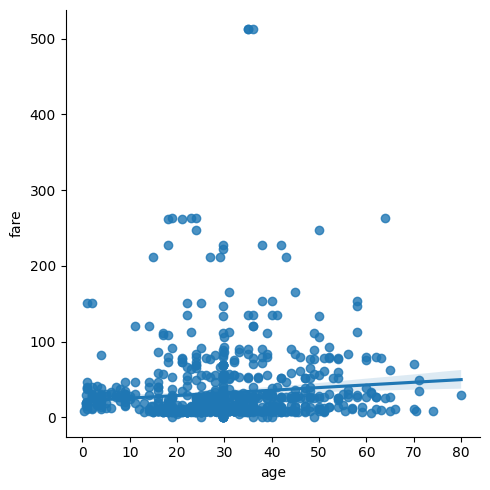

In [15]:
# ab hum plot draw kr kah deikhty hai 
# Lm plot bna kr deikhty hai 
sns.lmplot(data=df_linear,x='age',y='fare')


<Axes: ylabel='fare'>

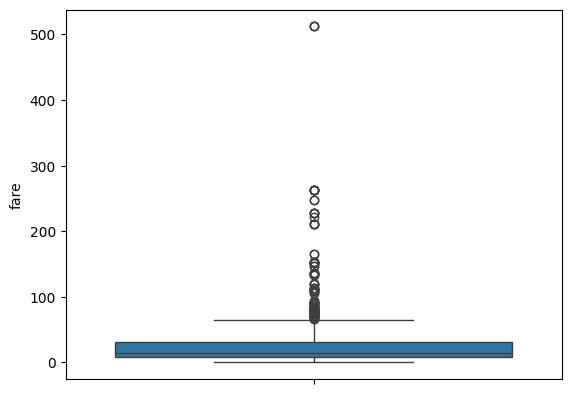

In [16]:
sns.boxplot(data=df_linear,y='fare')

<Axes: ylabel='age'>

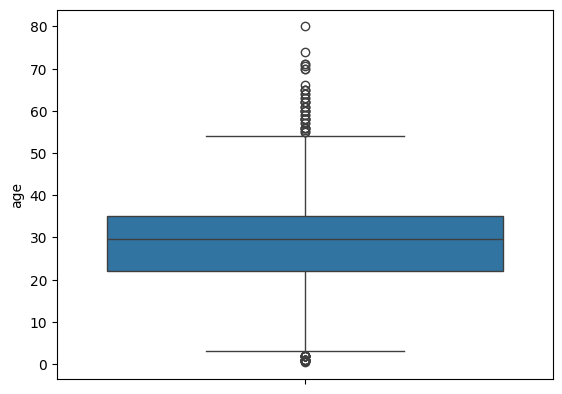

In [17]:
# ab hum ny iska box plot bna kr deikhna hai aur outliers remove krny hai 
sns.boxplot(data=df_linear,y='age')

In [18]:
df_linear = df_linear[(df_linear['age']> 8) & (df_linear['age']< 50)]

In [19]:
# # using IQR method 
# Q1 = df_linear['age'].quantile(0.25)
# Q3 = df_linear['age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR



# df_linear = df_linear[(df_linear['age']> lower_bound) & (df_linear['age']< upper_bound)]

In [20]:
df_linear['fare'].min()

np.float64(0.0)

In [21]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 40)] 

In [22]:
# Q1 = df_linear['fare'].quantile(0.25)
# Q3 = df_linear['fare'].quantile(0.75) 
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR
# df_linear = df_linear[(df_linear['fare'] > lower_bound) & (df_linear['fare'] < upper_bound)] 

<Axes: ylabel='age'>

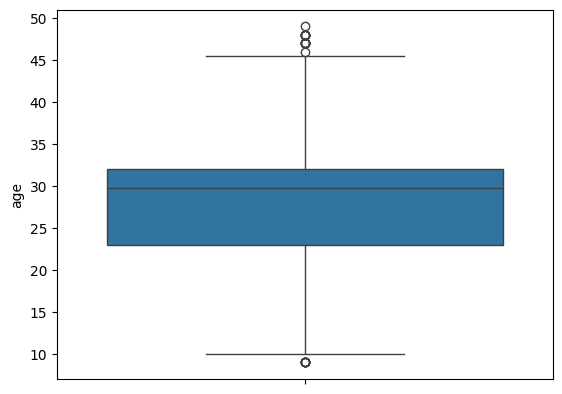

In [23]:
sns.boxplot(data=df_linear,y='age')

<Axes: ylabel='fare'>

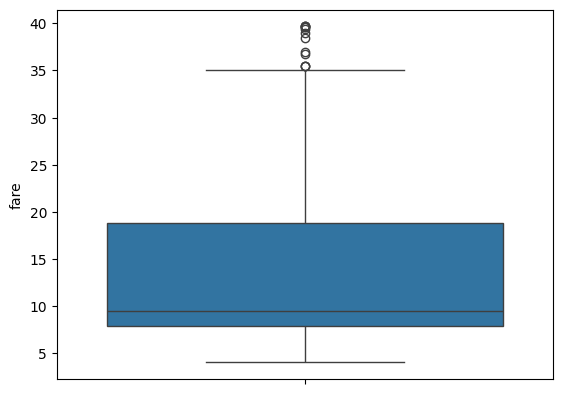

In [24]:
sns.boxplot(data=df_linear,y='fare')

In [25]:
# ab hn ny linear regression krni hai aur is emi x aur y ko define kren gy 
X = df_linear[['age']]
y = df_linear['fare']

In [26]:
X.isnull().sum()

age    0
dtype: int64

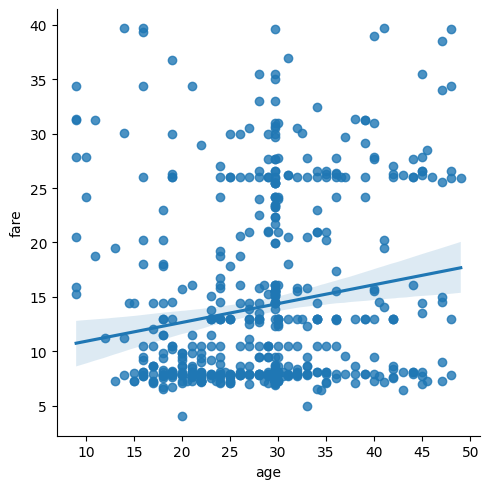

In [27]:
# ab lm plot draw krty hai iska 
sns.lmplot(data=df_linear,x='age',y='fare')
# phir hmny ye bhi deikhna hai kah is mei sy hmny line ki value kaisy deikhni hai 
# is  mei sb points line sy khush nahi hai 


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# model bula lein 
model = LinearRegression()

# train the model  
model.fit(X,y)

# ab hmny isko predict krna hai
model.predict([[80]])
# ye bat yad rkhni hai kah two lgani hai is mai 
# X= feature and Y= label in machine learning 
# jb bhi hmny model train kr kah dena hai to seperate nahi dena aik hi mei dena hai 

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.05317906])

In [29]:
# phir hmny ye bhi check krna hai akh model kam kaisy kr rha hai 
# model evaluation with metrics
# r2 
# mean squared error 
# MAE
# RMSE
# inhi four metrics ny hmko btana hai kah accuracy kitni hai  prediction mei
# hmny data ko train aur  test mei change kr dena hai 

X_train,  X_test, y_train, y_test = train_test_split (X,y, train_size=0.8)  

# ab hmny again model ko train krna hai 
model = LinearRegression()
# train 
model.fit(X_train,y_train)
# prediction 
prediction = model.predict(X_test)
# phir jo value aye gi hmary pass to usko hm jo asl value  hai  us ys  compare kren gy accuracy check krny ky liye 



In [30]:
prediction

array([15.03745651, 14.4418273 , 14.4418273 , 15.21790196, 13.23300198,
       12.69166562, 10.70676564, 17.02235649, 14.49612015, 13.95478379,
       13.77433834, 16.12012922, 14.3156747 , 13.59389289, 14.4418273 ,
       15.21790196, 14.85701105, 15.21790196, 14.4418273 , 15.21790196,
       14.4418273 , 17.20280194, 12.15032926, 12.69166562, 12.78188835,
       12.87211108, 14.4418273 , 14.4418273 , 14.4418273 , 17.20280194,
       14.4418273 , 12.33077472, 13.59389289, 13.59389289, 14.13522924,
       16.66146558, 16.30057468, 14.4418273 , 12.51122017, 13.77433834,
       17.38324739, 14.4418273 , 14.6765656 , 14.4418273 , 11.96988381,
       11.96988381, 14.4418273 , 14.4418273 , 14.4418273 , 14.49612015,
       14.4418273 , 14.6765656 , 17.02235649, 11.248102  , 12.33077472,
       15.57879286, 14.4418273 , 14.4418273 , 12.15032926, 14.4418273 ,
       14.4418273 , 14.4418273 , 12.33077472, 11.78943836, 14.4418273 ,
       14.4418273 , 14.13522924, 13.41344743, 14.4418273 , 14.44

<Axes: xlabel='fare'>

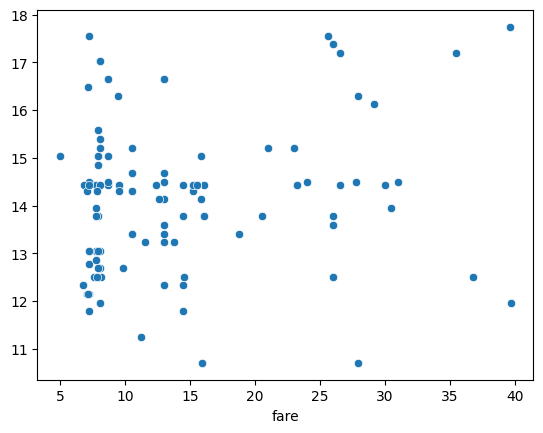

In [31]:
sns.scatterplot(x=y_test, y=prediction)
# agr linear line aye to sahi ho  ga 
# ab iski accuracy  sahi nhi hai 

In [32]:
X_train.shape

(482, 1)

In [33]:
X_test.shape

(121, 1)

In [34]:
# ab score ki base pr check krty hai 
model.score(X_test,y_test) 

0.014263139137079994

In [1]:
# checking errors 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
fMAE = mean_absolute_error(y_true=y_test,y_pred=prediction)
MSE = mean_squared_error (y_true=y_test,y_pred=prediction)
RMSE = mean_squared_error(y_true=y_test,y_pred=prediction)
R2 = r2_score(y_true=y_test,y_pred=prediction)

print ("MAE:",MAE)
print ("MSE:",MSE)
print ("RMSE:",RMSE)
print ("R2:",R2)

NameError: name 'y_test' is not defined